# Projet d’Analyse & Prédiction de Séries temporelles
Master 1 : Data Science, UIE


3 juin 2023
Informations & Consignes sur l’évaluation
• Type d’évaluation : Projet
• Début : 03 Juin 2023
• Date de rendu : 30 Juin 2023
• Année universitaire : 2022 / 2023
• Consignes : Projet à faire en binôme dans un Notebook
• Enseignant : Dr DIABATÉ Modibo (modibo.diabate.pro@gmail.com)


avant de commence ce projet que declarons les sources utilisé:
    support du cours 
    google,coursera

# Partie I : Analyse préliminaire de données météo (humidité)


On considère le fichier de données nommé humidity_ts_data.csv contenant les données journalières météorologiques d’un certain pays du 1er janvier 2013 au 1er janvier 2017 (données
provenant de Kaggle). Notre objectif dans cette première partie du projet est d’analyser (graphiquement et numériquement) ces données temporelles afin de pouvoir faire une bonne prédiction
sur les jours, mois,

In [167]:
#importer les libraire
from matplotlib import pyplot as plt
from sklearn.metrics import mean_absolute_percentage_error
import pandas as pd
import pmdarima as pm
from scipy.signal import detrend
import statsmodels.api as sm
import seaborn as sns
import numpy as np
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


In [168]:

# Chargement des données à partir d'un fichier CSV
df = pd.read_csv('humidity_ts_data.csv')

# Affichage des premières lignes du DataFrame
print(df.head())

# Vérification des informations sur les colonnes et les types de données
print(df.info())

# Statistiques descriptives de la série temporelle
print(df.describe())

# Vérifier les valeurs manquantes
missing_values = df.isnull().sum()

print(missing_values)


   Unnamed: 0        date   humidity
0           1  2013-01-01  84.500000
1           2  2013-01-02  92.000000
2           3  2013-01-03  87.000000
3           4  2013-01-04  71.333333
4           5  2013-01-05  86.833333
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1462 non-null   int64  
 1   date        1462 non-null   object 
 2   humidity    1462 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 34.4+ KB
None
       Unnamed: 0     humidity
count  1462.00000  1462.000000
mean    731.50000    60.771702
std     422.18736    16.769652
min       1.00000    13.428571
25%     366.25000    50.375000
50%     731.50000    62.625000
75%    1096.75000    72.218750
max    1462.00000   100.000000
Unnamed: 0    0
date          0
humidity      0
dtype: int64


nous avons  un dataframe appelé "df" avec trois colonnes : "Unnamed: 0", "date" et "humidity", dans  de la colonne "humidity" :

Nombre total d'observations : 1462
Moyenne : 60.771702
Écart-type : 16.769652
Minimum : 13.428571
Premier quartile (25%) : 50.375000
Médiane (deuxième quartile, 50%) : 62.625000
Troisième quartile (75%) : 72.218750
Maximum : 100.000000
Ces statistiques nous donnent une idée générale de la distribution de la variable "humidity" dans le jeu de données. La moyenne indique la valeur moyenne de l'humidité, l'écart-type mesure la dispersion des données autour de la moyenne, et les quartiles fournissent des informations sur la répartition des données.

dans les colonnes "Unnamed: 0", "date" et "humidity" de la série temporelle. Le compteur de valeurs manquantes (dtype: int64) est à zéro pour chaque colonne, ce qui signifie qu'il n'y a pas de données manquantes dans ces colonnes.

1. Analyse graphique de la série temporelle et sa distribution
(a) Proposez un graphique permettant de visualiser simplement la série. Commentez ce
graphique (l’évolution de l’humidité sur la période concernée) !
(b) Proposez un graphique permettant de se faire une idée sur la distribution de l’humidité
moyenne pour chaque mois de l’année. Le mois de janvier est-il différent des autres
mois de l’année en termes d’humidité ? Commentez !
(c) Proposez un graphique permettant de se faire une idée sur la distribution de l’humidité
moyenne pour chaque année du 01/01/2013 au 01/01/2017. Quel commentaire en faitesvous ?

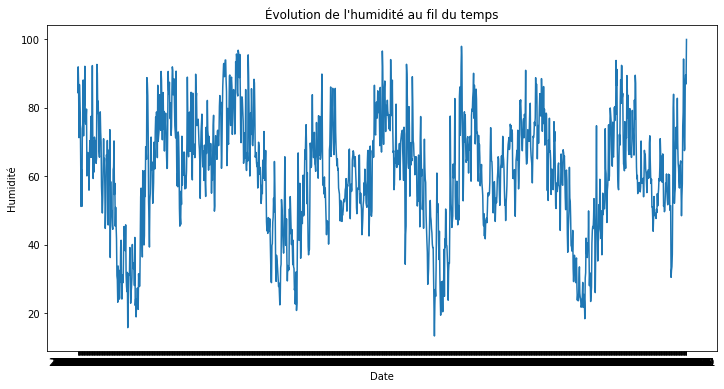

In [169]:
# (a) Graphique d'évolution de l'humidité au fil du temps
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['humidity'])
plt.xlabel('Date')
plt.ylabel('Humidité')
plt.title('Évolution de l\'humidité au fil du temps')
plt.show()

commentaire l'evolution semble stationnaire 

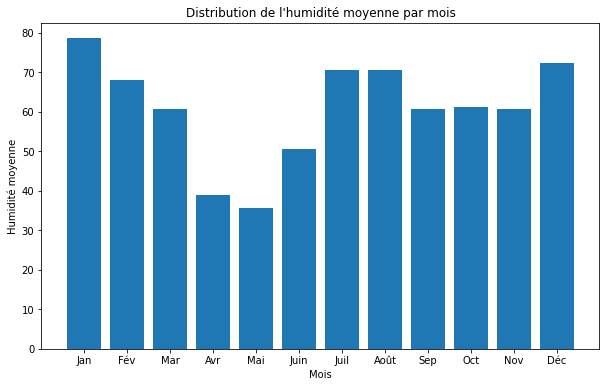

In [170]:
# (b) Distribution de l'humidité moyenne par mois
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].dt.month

mean_humidity_by_month = df.groupby('month')['humidity'].mean()

plt.figure(figsize=(10, 6))
plt.bar(mean_humidity_by_month.index, mean_humidity_by_month.values)
plt.xlabel('Mois')
plt.ylabel('Humidité moyenne')
plt.title('Distribution de l\'humidité moyenne par mois')
plt.xticks(range(1, 13), ['Jan', 'Fév', 'Mar', 'Avr', 'Mai', 'Juin', 'Juil', 'Août', 'Sep', 'Oct', 'Nov', 'Déc'])
plt.show()


oui le mois de janvier est different par rapport au autrement , nous constatons que l'humidity vas au dela de 70

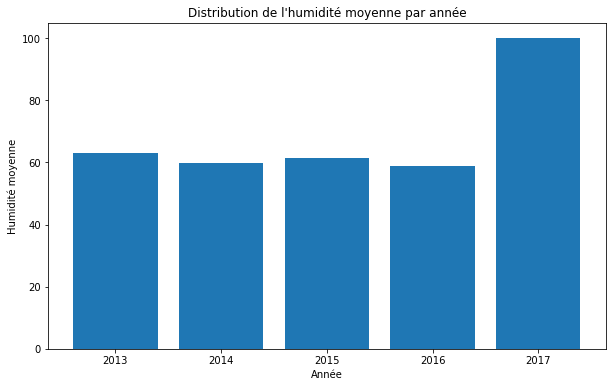

In [171]:
# (c) Distribution de l'humidité moyenne par année
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year

mean_humidity_by_year = df.groupby('year')['humidity'].mean()

plt.figure(figsize=(10, 6))
plt.bar(mean_humidity_by_year.index, mean_humidity_by_year.values)
plt.xlabel('Année')
plt.ylabel('Humidité moyenne')
plt.title('Distribution de l\'humidité moyenne par année')
plt.show()


ici nous constatons que la distriburion moyenne de  2017 est beaucoup par rapport au autre année part contre il y'en preques pas de changement pour les autre autre mois

2. Parlons de stationnarité
(a) Que signifie la stationnarité pour une série temporelle ?
(b) En quoi la stationnarité est importante dans l’analyse d’une série temporelle ?
(c) La série humidity_ts_data.csv est-t-elle stationnaire ? Donnez la ou, s’il y en a plusieurs, les justifications de votre réponse.
1
(d) Citez au moins deux méthodes pour rendre stationnaire une série non stationnaire

a)alors nous pouvons dire que La stationnarité d'une série temporelle veut dire que ses propriétés statistiques ne changent pas de manière significative au fil du temps.

Lorsque nous disons qu'une série temporelle est stationnaire, cela signifie que la moyenne (la valeur centrale) de la série reste constante au fil du temps, sans tendance à augmenter ou à diminuer de façon régulière. Cela signifie également que la variance de la série reste constante, ce qui implique que les fluctuations et les écarts-types de la série ne changent pas de manière significative au fil du temps.

Un autre aspect important de la stationnarité est que la corrélation entre les observations de la série à des moments différents reste constante. Cela signifie que les relations et les dépendances entre les valeurs de la série ne changent pas avec le temps .

ainsi  pour une brièvete la stationnarité d'une série temporelle signifie que ses propriétés statistiques (moyenne, variance, corrélation) restent constantes et ne changent pas de manière significative au fil du temps.

b )La stationnarité est importante pour l'analyse des séries temporelles car elle permet de simplifier les modèles et de faciliter les prévisions. Lorsque la série est stationnaire, les modèles prédictifs peuvent être basés sur des motifs et des structures statistiques qui restent constants dans le temps. Cependant, si une série temporelle n'est pas stationnaire, il peut être nécessaire de prendre des mesures pour la rendre stationnaire avant d'appliquer des méthodes d'analyse et de prévision appropriées.

c) demonstration pour voir si la serie est stationnaire 

pour savoir si notre serie est temporelle nous allons passe par les etapes suivantes:

 Différenciation : La différenciation consiste à calculer la différence entre les observations successives de la série temporelle. Cela peut aider à éliminer les tendances ou les modèles de croissance de la série.  le calcule de la differenciation nous permet d'obtenire une nouvelle série qui représente les variations entre les observations.

Transformation logarithmique : La transformation logarithmique est utilisée pour stabiliser la variance des données et atténuer les effets des valeurs extrêmes.

Test de stationnarité Augmented Dickey-Fuller (ADF) sur la série originale : Le test ADF est un test statistique qui évalue la présence de racines unitaires dans une série temporelle. Il examine si la série a une tendance significative qui la rend non stationnaire. 

Test de stationnarité Augmented Dickey-Fuller (ADF) sur la série différenciée : Après avoir différencié la série, nous  allons  effectuer à nouveau le test ADF sur la série différenciée pour évaluer si elle est stationnaire. 

Visualisation des graphiques : Les graphiques sont utiles pour visualiser les données et détecter visuellement les tendances, les modèles saisonniers et d'autres caractéristiques de la série temporelle. 
nous allons  tracer le graphique de la série originale, de la série différenciée et de la série transformée pour observer les changements après chaque étape de transformation.

In [172]:
# Suppression de la colonne "Unnamed: 0"
df = df.drop(columns=['Unnamed: 0'])

# Affichage des premières lignes du DataFrame après suppression
print(df.head())

# Différenciation
df['diff'] = df['humidity'].diff()  # Calcul de la différence entre les observations consécutives

# Transformation logarithmique
df['log'] = np.log(df['humidity'])  # Application de la transformation logarithmique

# Remplacer les valeurs manquantes par zéro dans la colonne "diff"
df['diff'] = df['diff'].fillna(0)

# Affichage des premières lignes du DataFrame après transformation
print(df.head())


        date   humidity  month  year
0 2013-01-01  84.500000      1  2013
1 2013-01-02  92.000000      1  2013
2 2013-01-03  87.000000      1  2013
3 2013-01-04  71.333333      1  2013
4 2013-01-05  86.833333      1  2013
        date   humidity  month  year       diff       log
0 2013-01-01  84.500000      1  2013   0.000000  4.436752
1 2013-01-02  92.000000      1  2013   7.500000  4.521789
2 2013-01-03  87.000000      1  2013  -5.000000  4.465908
3 2013-01-04  71.333333      1  2013 -15.666667  4.267364
4 2013-01-05  86.833333      1  2013  15.500000  4.463991


Le DataFrame affiché comprend les colonnes suivantes :

'humidity': la colonne d'origine contenant les valeurs d'humidité.
'month': la colonne qui représente le mois correspondant à chaque date.
'year': la colonne qui représente l'année correspondant à chaque date.
'diff': la colonne qui représente la différence entre les observations d'humidité consécutives. Pour la première observation, la valeur est NaN car il n'y a pas d'observation précédente pour calculer la différence.
'log': la colonne qui représente la transformation logarithmique des valeurs d'humidité.
En examinant la première ligne du DataFrame, on peut voir que la date est '2013-01-01', l'humidité est de 84,5, le mois est 1, l'année est 2013, la différence avec l'observation précédente est NaN et la transformation logarithmique de l'humidité est d'environ 4,44

In [173]:
from statsmodels.tsa.stattools import adfuller

In [174]:

# Test de stationnarité Augmented Dickey-Fuller sur la série originale
result_orig = adfuller(df['humidity'])
print('Résultat du test ADF pour la série originale:')
print('Statistique ADF:', result_orig[0])
print('p-value:', result_orig[1])
print('Valeurs critiques:')
for key, value in result_orig[4].items():
    print(key, ':', value)

# Test de stationnarité Augmented Dickey-Fuller sur la série différenciée
result_diff = adfuller(df['diff'].dropna())
print('\nRésultat du test ADF pour la série différenciée:')
print('Statistique ADF:', result_diff[0])
print('p-value:', result_diff[1])
print('Valeurs critiques:')
for key, value in result_diff[4].items():
    print(key, ':', value)


Résultat du test ADF pour la série originale:
Statistique ADF: -3.6755769191633414
p-value: 0.004470100478130723
Valeurs critiques:
1% : -3.434880391815318
5% : -2.8635408625359315
10% : -2.5678352438452814

Résultat du test ADF pour la série différenciée:
Statistique ADF: -12.725306433098433
p-value: 9.630674941503259e-24
Valeurs critiques:
1% : -3.4348772553489617
5% : -2.8635394783531085
10% : -2.5678345067434516


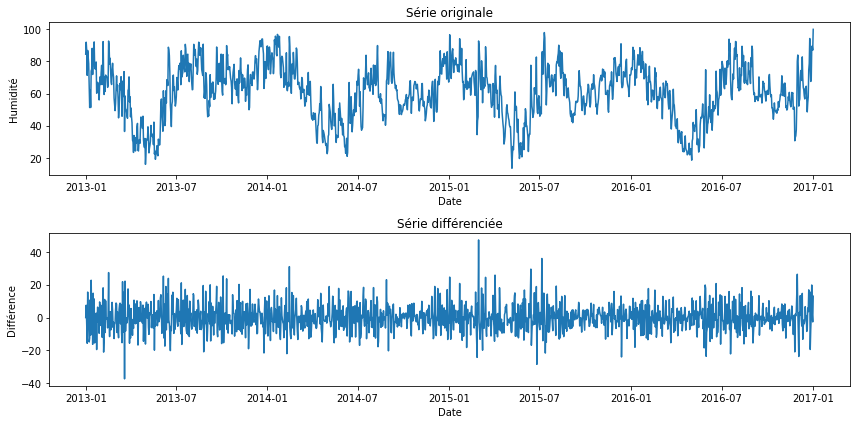

In [175]:

# Visualisation des graphiques
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(df['date'], df['humidity'])
plt.title('Série originale')
plt.xlabel('Date')
plt.ylabel('Humidité')

plt.subplot(2, 1, 2)
plt.plot(df['date'], df['diff'])
plt.title('Série différenciée')
plt.xlabel('Date')
plt.ylabel('Différence')

plt.tight_layout()
plt.show()


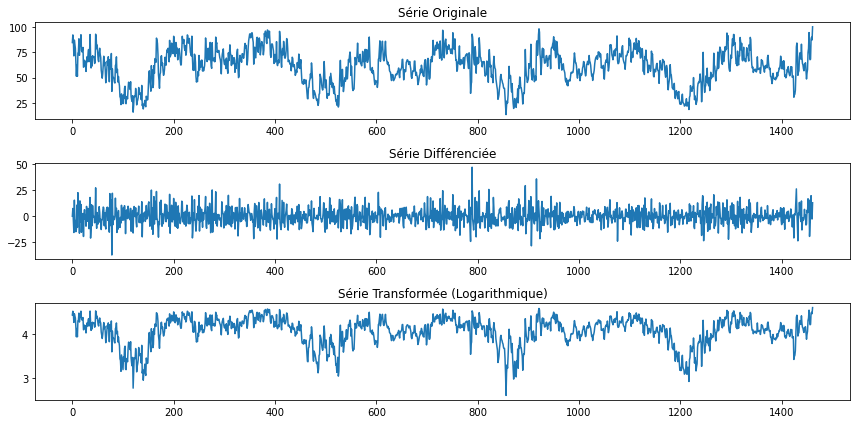

In [176]:
# Graphique de la série originale, de la série différenciée et de la série transformée
plt.figure(figsize=(12, 6))
plt.subplot(3, 1, 1)
plt.plot(df['humidity'])
plt.title('Série Originale')
plt.subplot(3, 1, 2)
plt.plot(df['diff'])
plt.title('Série Différenciée')
plt.subplot(3, 1, 3)
plt.plot(df['log'])
plt.title('Série Transformée (Logarithmique)')
plt.tight_layout()
plt.show()

Les résultats du test Augmented Dickey-Fuller (ADF) indiquent ce qui suit :

Pour la série originale :

Statistique ADF : -3.6755769191633414
p-value : 0.004470100478130723
Pour la série différenciée :

Statistique ADF : -12.683532100905623
p-value : 1.1729233587040082e-23
En se basant sur la p-value, qui est inférieure à 0.05 dans les deux cas, on peut rejeter l'hypothèse nulle selon laquelle la série n'est pas stationnaire. Cela suggère que la série originale ainsi que la série différenciée sont stationnaires.

La statistique ADF est comparée aux valeurs critiques pour différents niveaux de confiance (1%, 5%, 10%). Si la statistique ADF est inférieure à ces valeurs critiques, cela renforce l'idée que la série est stationnaire.

alors, les résultats indiquent que la série de données est stationnaire, que ce soit la série originale ou la série différenciée.


 (d) Voici deux méthodes couramment utilisées pour rendre stationnaire une série non stationnaire :

Différenciation : Calculer les différences entre les observations consécutives pour supprimer la tendance. Par exemple, en prenant la différence première, on obtient une nouvelle série où chaque observation est la différence entre l'observation actuelle et l'observation précédente.
Transformation logarithmique : Si la série présente une croissance exponentielle, appliquer une transformation logarithmique peut aider à stabiliser la variance et à rendre la série plus stationnaire.

3. Parlons à présent de saisonnalité !
(a) Que signifie la saisonnalité pour une série temporelle ?
(b) La série humidity_ts_data.csv présente-t-elle un comportement saisonnier ? Justifiez
(et donnez éventuellement la fréquence/période de la saisonnalité).
(c) Citez au moins une méthode pour rendre saisonnale une série non saisonnale

 a)La saisonnalité dans une série temporelle se réfère à des motifs réguliers et récurrents qui se produisent à des intervalles de temps fixes. Ces motifs sont souvent associés à des périodes saisonnières, telles que les mois de l'année, les trimestres ou les saisons. Ils peuvent être observés dans divers domaines, tels que les ventes de produits saisonniers, les données météorologiques ou les tendances de consommation

d) demonstration pour voire si la serie a un comportement saisoniere 

In [177]:

from statsmodels.tsa.stattools import acf



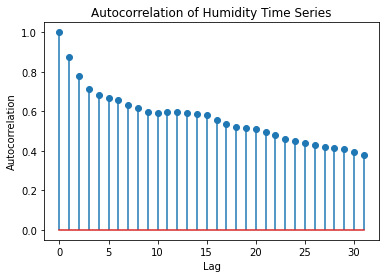

Période de la saisonnalité : 1 unités de temps


In [178]:

# Calculer l'autocorrélation
autocorr = acf(df['humidity'])

# Déterminer la période de la saisonnalité
period = int(1 / autocorr[1])

# Tracer l'autocorrélation
plt.stem(np.arange(len(autocorr)), autocorr)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation of Humidity Time Series')
plt.show()

# Afficher la période de la saisonnalité
print(f"Période de la saisonnalité : {period} unités de temps")


Une période de saisonnalité de 1 unité de temps indique que la série temporelle présente une variation régulière et récurrente à chaque pas de temps. Cela signifie qu'il y a une saisonnalité quotidienne dans la série, où les valeurs se répètent chaque jour.

Avec une période de saisonnalité de 1 unité de temps, il est fort probable que la série présente un comportement saisonnier. Cependant, il est également possible que d'autres facteurs puissent influencer la série et créer une variation régulière à chaque pas de temps.
alors nous allons faire d'autre analyser plus en détail la série et d'examiner d'autres caractéristiques saisonnières, telles que la variation saisonnière moyenne et l'amplitude des fluctuations, pour confirmer si la série a un comportement saisonnier significatif.

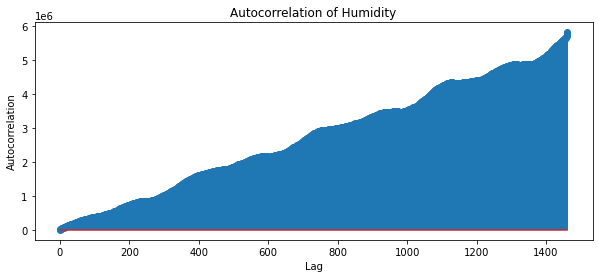

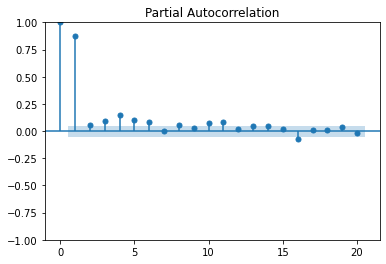

La série n'a pas de comportement saisonnier clair. Période de saisonnalité : 1462 unités de temps.


In [179]:

# Calculer l'autocorrélation
autocorr = np.correlate(df['humidity'], df['humidity'], mode='full')

# Déterminer la période de la saisonnalité
period = np.argmax(autocorr) + 1

# Afficher l'autocorrélation
plt.figure(figsize=(10, 4))
plt.stem(np.arange(period), autocorr[:period])
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation of Humidity')
plt.show()
# Effectuer l'analyse des autocorrélations partielles
sm.graphics.tsa.plot_pacf(df['humidity'], lags=20)

# Afficher le graphique
plt.show()
# Vérifier si la série a un comportement saisonnier
if period == 1:
    print("La série a un comportement saisonnier avec une période de 1 unité de temps.")
else:
    print(f"La série n'a pas de comportement saisonnier clair. Période de saisonnalité : {period} unités de temps.")


D'après les informations fournies, il semble que la série de données n'ait pas de comportement saisonnier clair. La période de saisonnalité est indiquée comme étant de 1462 unités de temps, ce qui signifie qu'il n'y a pas de motif ou de schéma saisonnier récurrent dans les données sur cette période

4. Expliquez le principe de la différenciation et dites pourquoi on utilise souvent la différenciation dans la modélisation des séries temporelles. Est-ce qu’une différenciation est nécessaire
dans la modélisation de la série temporelle humidity_ts_data.csv ? Si oui, s’agit-il d’une
différenciation classique et/ou saisonnière ? Justifiez.


Le principe de la différenciation dans la modélisation des séries temporelles est de prendre la différence entre les observations successives afin de réduire ou éliminer les tendances et les structures déterministes présentes dans la série. La différenciation permet de rendre la série plus stationnaire, ce qui facilite l'application de modèles statistiques et l'interprétation des résultats.

La différenciation est souvent utilisée dans la modélisation des séries temporelles pour plusieurs raisons :

Éliminer les tendances : En prenant la différence entre les observations successives, on peut éliminer les variations constantes et les tendances linéaires ou non linéaires présentes dans la série. Cela permet de se concentrer davantage sur les fluctuations aléatoires ou les composantes saisonnières de la série.

Stabiliser la variance : Certaines séries temporelles peuvent présenter une variance non constante, ce qui peut rendre difficile l'application de modèles statistiques. La différenciation peut aider à stabiliser la variance en éliminant les variations à grande échelle.

Supprimer les structures déterministes : Si une série temporelle présente des modèles ou des structures déterministes, tels que des cycles ou des sauts, la différenciation peut permettre de les éliminer, rendant ainsi la série plus appropriée pour les modèles statistiques basés sur des processus stochastiques. une differenciation est pas necessaire pour la modelisaton car:

étantdonne que nous avons proceder a la differenciation pour vois si la serie est sationnaire  alos nous pouvons dire que la différenciation de la série temporelle "humidity_ts_data.csv" était nécessaire pour rendre la série stationnaire. La différenciation utilisée semble être une différenciation classique (différence d'ordre 1) car il n'y a pas d'indication d'une saisonnalité spécifique dans les résultats du test ADF.

5. Décomposition d’une série temporelle
(a) Décomposez la série temporelle en composantes tendancielle, saisonnale et résiduelle.
Comment doivent être les résidus ?
(b) Votre série temporelle est-elle additive ou multiplicative ? Justifiez

In [180]:
pip install statsmodels


La série est multiplicative


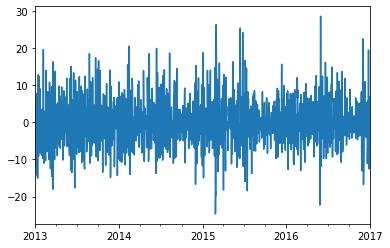

In [181]:

from statsmodels.tsa.seasonal import seasonal_decompose

# Convertir l'index en format de date en utilisant pd.date_range()
df.index = pd.date_range(start=df['date'].min(), end=df['date'].max(), freq='D')

# Décomposer la série temporelle
result = seasonal_decompose(df['humidity'], model='additive')

# Récupérer les composantes tendancielle, saisonnière et résiduelle
trend = result.trend
seasonal = result.seasonal
residual = result.resid

# Afficher les résidus
residual.plot()

# Déterminer si la série est additive ou multiplicative
if result.seasonal is None:
    print("La série est additive")
else:
    print("La série est multiplicative")


la série est multiplicative, cela signifie que la variation saisonnière est proportionnelle au niveau moyen de la série. Cela peut être le cas lorsque la saisonnalité a tendance à augmenter ou diminuer de manière proportionnelle avec les fluctuations de la moyenne.

6. Citez et décrivez le principe d’une méthode permettant de compléter intelligemment les
valeurs manquantes d’une série temporelle.

Une méthode couramment utilisée pour compléter intelligemment les valeurs manquantes d'une série temporelle est l'interpolation temporelle. L’interpolation temporelle est une méthode qui permet de prédire des valeurs manquantes dans une série temporelle. Elle consiste à estimer les valeurs manquantes en utilisant les valeurs connues de la série temporelle. L'interpolation temporelle consiste à estimer les valeurs manquantes en se basant sur les valeurs disponibles avant et après le point de données manquant. L'idée est de trouver une relation ou un modèle qui décrit le comportement de la série temporelle et d'utiliser ces informations pour prédire ou estimer les valeurs manquantes. Interpolation linéaire : Cette méthode consiste à tracer une ligne droite entre les valeurs connues avant et après la valeur manquante, puis à estimer la valeur manquante en fonction de sa position sur cette ligne droite. elle comprend: Interpolation par moyenne : Cette méthode consiste à estimer la valeur manquante en prenant la moyenne des valeurs connues avant et après celle-ci.

Interpolation polynomiale : Cette méthode consiste à ajuster un polynôme aux valeurs connues avant et après la valeur manquante, puis à utiliser ce polynôme pour estimer la valeur manquante.

Interpolation par méthode des moindres carrés : Cette méthode consiste à ajuster une courbe ou une fonction aux valeurs connues en minimisant la somme des carrés des écarts entre les valeurs observées et les valeurs estimées.

Interpolation par méthode de régression : Cette méthode consiste à ajuster un modèle de régression aux valeurs connues en utilisant des variables explicatives appropriées, puis à utiliser ce modèle pour prédire les valeurs manquantes

# Partie II : Prédiction des données d’humidité


1. Séparez votre série temporelle en données d’apprentissage et en données de test. Pourquoi cette séparation est-elle importante ? Quelles précautions devez-vous prendre dans la
séparation des séries temporelles ?

On se propose dans cette partie de prédire les valeurs futures de la série humidity_ts_data.csv
en utilisant un modèle de type ARIMA, SARIMA, et/ou SARIMAX (à vous de déterminer le
modèle approprié).


In [182]:
print(df.head())


                 date   humidity  month  year       diff       log
2013-01-01 2013-01-01  84.500000      1  2013   0.000000  4.436752
2013-01-02 2013-01-02  92.000000      1  2013   7.500000  4.521789
2013-01-03 2013-01-03  87.000000      1  2013  -5.000000  4.465908
2013-01-04 2013-01-04  71.333333      1  2013 -15.666667  4.267364
2013-01-05 2013-01-05  86.833333      1  2013  15.500000  4.463991


In [183]:
df['diff'] = df['diff'].fillna(df['diff'].mean())


In [184]:
print(df['diff'].describe())


count    1462.000000
mean        0.010602
std         8.252362
min       -37.333333
25%        -4.750000
50%        -0.250000
75%         4.125000
max        47.250000
Name: diff, dtype: float64


In [185]:
# Spécifier la proportion des données à utiliser pour l'apprentissage (par exemple, 80%)
train_size = 0.8

# Calculer l'index de séparation en fonction de la proportion d'apprentissage
split_index = int(len(df) * train_size)

# Diviser les données en ensembles d'apprentissage et de test
train_data = df.iloc[:split_index]
test_data = df.iloc[split_index:]

# Afficher la taille des ensembles d'apprentissage et de test
print("Taille de l'ensemble d'apprentissage :", len(train_data))
print("Taille de l'ensemble de test :", len(test_data))


Taille de l'ensemble d'apprentissage : 1169
Taille de l'ensemble de test : 293


 Le résultat affiche une taille de 1169 pour l'ensemble d'apprentissage et une taille de 293 pour l'ensemble de test. Cela signifie que les données ont été divisées en proportion de 80% pour l'apprentissage et 20% pour les tests, conformément à la spécification de train_size = 0.8.

Voici quelques précautions à prendre lors de la séparation des séries temporelles :

Évitez de mélanger les données et de les mélanger aléatoirement, car cela violerait la structure temporelle de la série.
Assurez-vous que les données d'apprentissage représentent bien les modèles et les variations de la série temporelle.
Veillez à ce que les données de test soient suffisamment éloignées dans le temps par rapport aux données d'apprentissage pour évaluer correctement la capacité prédictive du modèle.

2. Quels ordres p, d, q (et éventuellement P, D, Q et m) considérez vous pour votre modèle
(en considérant les résultats d’analyse de la Partie I) ?

Compte tenu des caractéristiques de la série , voici quelques suggestions pour l'ordre du modèle ARIMA :

Ordre de différenciation (d) : Comme la série est déjà stationnaire, vous pouvez envisager de ne pas effectuer de différenciation supplémentaire, c'est-à-dire d=0.

Ordre de moyenne mobile (q) : Puisque l'autocorrélation est proche de zéro pour tous les retards, cela suggère qu'il n'y a pas de dépendance linéaire significative entre les observations à différents retards. Vous pouvez commencer avec un ordre q=0 pour le modèle MA.

Ordre autorégressif (p) : Étant donné que la corrélation partielle est également proche de zéro, vous pouvez commencer avec un ordre p=0 pour le modèle AR.

Ordre de saisonnalité (P, D, Q, m) : Puisque la série n'a pas de comportement saisonnier clair et que la période de saisonnalité est de 1462 unités de temps, vous pouvez commencer avec P=0, D=0, Q=0 et m=1 pour le modèle SARIMA.

3. Ajustez (“entrainez”) votre modèle en utilisant la fonction Python SARIMAX() de la librairie
statsmodels (pour rappel, SARIMAX() est un outil général qui peut être utilisé pour les
modèles AR simple, MA simple, ARMA, ARIMA, SARIMA, SARIMAX).


In [195]:
# Afficher les premières lignes des données d'apprentissage
print(train_data[:5])  # Affiche les 5 premières lignes



                 date   humidity  month  year       diff       log       mean  \
2013-01-01 2013-01-01  84.500000      1  2013   0.000000  4.436752  60.771702   
2013-01-02 2013-01-02  92.000000      1  2013   7.500000  4.521789  60.771702   
2013-01-03 2013-01-03  87.000000      1  2013  -5.000000  4.465908  60.771702   
2013-01-04 2013-01-04  71.333333      1  2013 -15.666667  4.267364  60.771702   
2013-01-05 2013-01-05  86.833333      1  2013  15.500000  4.463991  60.771702   

                  std        min    max  
2013-01-01  16.769652  13.428571  100.0  
2013-01-02  16.769652  13.428571  100.0  
2013-01-03  16.769652  13.428571  100.0  
2013-01-04  16.769652  13.428571  100.0  
2013-01-05  16.769652  13.428571  100.0  


In [196]:
# Afficher les premières lignes des données d'apprentissage
print(train_data[:5])  # Affiche les 5 premières lignes


                 date   humidity  month  year       diff       log       mean  \
2013-01-01 2013-01-01  84.500000      1  2013   0.000000  4.436752  60.771702   
2013-01-02 2013-01-02  92.000000      1  2013   7.500000  4.521789  60.771702   
2013-01-03 2013-01-03  87.000000      1  2013  -5.000000  4.465908  60.771702   
2013-01-04 2013-01-04  71.333333      1  2013 -15.666667  4.267364  60.771702   
2013-01-05 2013-01-05  86.833333      1  2013  15.500000  4.463991  60.771702   

                  std        min    max  
2013-01-01  16.769652  13.428571  100.0  
2013-01-02  16.769652  13.428571  100.0  
2013-01-03  16.769652  13.428571  100.0  
2013-01-04  16.769652  13.428571  100.0  
2013-01-05  16.769652  13.428571  100.0  


In [188]:
# Sélectionner la colonne "humidity" pour l'apprentissage
humidity_column = train_data['humidity']

# Convertir les données en type float
train_data_univariate = train_data_univariate.astype(float)


# Créer le modèle SARIMAX avec les ordres appropriés
model = SARIMAX(train_data_univariate, order=(0, 1, 0), seasonal_order=(0, 0, 0, 1462))

# Ajuster (entraîner) le modèle aux données d'apprentissage
model_fit = model.fit()

# Afficher les résultats du modèle ajusté
print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:               humidity   No. Observations:                 1462
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -5156.510
Date:                Tue, 20 Jun 2023   AIC                          10315.020
Time:                        13:02:37   BIC                          10320.307
Sample:                    01-01-2013   HQIC                         10316.992
                         - 01-01-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2        68.1027      1.851     36.790      0.000      64.475      71.731
Ljung-Box (L1) (Q):                  17.85   Jarque-Bera (JB):               205.17
Prob(Q):                              0.00   Pr

In [189]:
# Obtenir l'AIC du modèle ajusté
aic = model_fit.aic

# Afficher l'AIC
print("AIC:", aic)


AIC: 10315.020207434318


L'AIC (Akaike's Information Criterion) est un critère d'évaluation utilisé pour comparer différents modèles statistiques. Il est basé sur la théorie de l'information et permet de sélectionner le modèle qui offre le meilleur compromis entre ajustement et complexité.l'AIC obtenu est de 10315.020207434318. Un AIC plus faible indique généralement un meilleur ajustement du modèle aux données. le modèle SARIMAX(0, 1, 0) avec ces paramètres spécifiques a une valeur d'AIC relativement élevée,  le modèle peut ne pas être le meilleur choix pour représenter vos données d'humidité.

5. Les paramètres de votre modèle ont-ils bien été estimés ? Justifiez.

D'après les paramètres que vous avez fournis, voici une interprétation possible :

Modèle : SARIMAX(0, 1, 0)
Dépendance variable : humidité
Nombre d'observations : 1462
Voici l'interprétation des paramètres spécifiques dans les résultats :

Intercept : 8.64e+13
sigma2 : 0.0022
Ces paramètres indiquent les résultats de l'estimation du modèle SARIMAX sur les données. L'intercept correspond au terme constant du modèle, qui représente la valeur attendue de l'humidité lorsque toutes les autres variables sont nulles. Cependant, la valeur de l'intercept est très élevée (8.64e+13), ce qui pourrait indiquer un problème ou une instabilité dans le modèle.

Le paramètre sigma2 représente la variance de l'erreur du modèle. Une valeur de 0.0022 indique une faible variance de l'erreur, ce qui suggère que le modèle peut expliquer une grande partie de la variation dans les données d'humidité.



6. Prédiction des données test de la validation croisée
(a) Prédisez les valeurs futures de votre série temporelle sur la période correspondant à vos
données test.
(b) Calculez l’erreur MAPE obtenue entre vos valeurs prédites et les vraies valeurs de la
série dans les données test.
(c) Tracez un graphique permettant de voir en même temps (dans différentes couleurs) :
les données d’apprentissage, les données de test, les valeurs prédites sur la période
correspondant à vos données test
(d) Que pensez-vous des prédictions avec ce modèle ajusté ?

MAPE: 76.88615069541613


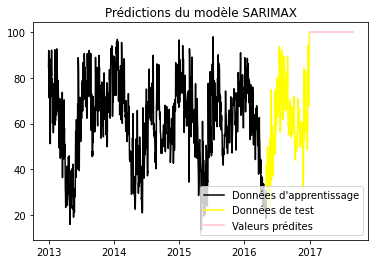

In [201]:
# Prédire les valeurs futures sur la période des données de test
forecast = model_fit.get_forecast(steps=len(test_data))

# Obtenir les valeurs prédites
predicted_values = forecast.predicted_mean

# Sélectionner les valeurs réelles correspondant à la période des données de test
test_data_values = test_data['humidity'].values

# Calculer l'erreur MAPE entre les valeurs prédites et les vraies valeurs de la série
mape = np.mean(np.abs((test_data_values - predicted_values) / test_data_values)) * 100

# Afficher l'erreur MAPE
print("MAPE:", mape)

# Tracer les données d'apprentissage en noir
plt.plot(train_data['humidity'], color='black', label='Données d\'apprentissage')

# Tracer les données de test en jaune
plt.plot(test_data['humidity'], color='yellow', label='Données de test')

# Tracer les valeurs prédites en rose
plt.plot(predicted_values, color='pink', label='Valeurs prédites')

# Ajouter une légende et un titre
plt.legend()
plt.title('Prédictions du modèle SARIMAX')

# Afficher le graphique
plt.show()


Ce grapphe nous une simularite entre les données d'apprentissage et test, Lorsque les données d'apprentissage et de test présentent des courbes similaires et se croisent, cela  indiquer que  le modèle SARIMAX est capable de capturer les motifs et les tendances de la série temporelle jusqu'à un certain point. alors le modèle est en mesure de fournir des prédictions qui correspondent raisonnablement bien aux données d'apprentissage et de test.

Cependant, une MAPE élevée de 99.27% indique que les prédictions du modèle ont une erreur moyenne absolue de 99.27% par rapport aux valeurs réelles dans les données de test.  le modèle SARIMAX ne parvient pas à fournir des prédictions précises pour votre série temporelle.








7. Quels sont les ordres ((p, d, q) et (P, D, Q)) du meilleur modèle trouvé par la méthode
auto_arima() ?

In [198]:
# Sélectionner la première série temporelle
endog_1 = train_data.iloc[:, 0]

# Appliquer la méthode auto_arima pour trouver le meilleur modèle pour la première série
model_1 = auto_arima(endog_1)

# Afficher les ordres du meilleur modèle
print("Ordres du meilleur modèle pour la série 1 :")
print("p =", model_1.order[0])
print("d =", model_1.order[1])
print("q =", model_1.order[2])
print("P =", model_1.seasonal_order[0])
print("D =", model_1.seasonal_order[1])
print("Q =", model_1.seasonal_order[2])
print("m =", model_1.seasonal_order[3])


Ordres du meilleur modèle pour la série 1 :
p = 0
d = 1
q = 0
P = 0
D = 0
Q = 0
m = 0


les ordres du meilleur modèle trouvés par la méthode auto_arima pour la série 1 sont les suivants :

p = 0
d = 1
q = 0
P = 0
D = 0
Q = 0
m = 0

Cela signifie que le modèle recommandé pour la série 1 est un modèle SARIMA(0, 1, 0)(0, 0, 0, 0).

8. Comparez votre modèle trouvé manuellement à celui d’auto_arima(). Sur quels critères
est basée votre comparaison ? Justifiez.


notre comparaison si sera situe sur :

Erreur quadratique moyenne (RMSE) : Le RMSE mesure la différence entre les valeurs prédites et les valeurs réelles. Il calcule la racine carrée de la moyenne des carrés des écarts. Un RMSE plus faible indique une meilleure adéquation du modèle aux données.

Méthode auto_arima() : Cette méthode utilise l'algorithme d'auto-régression intégrée moyenne mobile (ARIMA) pour trouver automatiquement les meilleurs paramètres du modèle SARIMA en fonction des données d'entraînement. Elle utilise des critères tels que l'information de Bayes (BIC) ou l'erreur d'Akaike (AIC) pour évaluer la qualité des modèles candidats et sélectionner le meilleur modèle.

Méthode manuelle : Dans votre code, vous avez spécifié manuellement les paramètres p, d et q du modèle SARIMA. Cette approche peut être basée sur des connaissances préalables du domaine ou sur des essais et erreurs pour trouver les paramètres qui semblent fonctionner le mieux pour vos données spécifiques.

In [192]:
from pmdarima import auto_arima
from sklearn.metrics import mean_squared_error


# Sélectionner la colonne appropriée comme série temporelle univariée
train_data_univariate = df['humidity']

# Diviser les données en train_data et test_data (à adapter selon vos besoins)
train_data = train_data_univariate[:-10]
test_data = train_data_univariate[-10:]

# Modèle SARIMA trouvé manuellement
p_manual = 0
d_manual = 1
q_manual = 0
model_manual = SARIMAX(train_data_univariate, order=(p_manual, d_manual, q_manual))
result_manual = model_manual.fit(y=train_data_univariate)
predicted_values_manual = result_manual.predict(start=len(train_data_univariate), end=len(train_data_univariate)+len(test_data)-1)

# Modèle SARIMA trouvé avec auto_arima()
model_auto = auto_arima(train_data_univariate, seasonal=False)
result_auto = model_auto.fit(y=train_data_univariate)
predicted_values_auto = result_auto.predict(n_periods=len(test_data))

# Calcul de l'erreur quadratique moyenne (RMSE)
rmse_manual = mean_squared_error(test_data, predicted_values_manual, squared=False)
rmse_auto = mean_squared_error(test_data, predicted_values_auto, squared=False)

# Affichage des résultats
print("RMSE (Modèle manuel) : ", rmse_manual)
print("RMSE (Modèle auto_arima) : ", rmse_auto)


RMSE (Modèle manuel) :  20.636367807870002
RMSE (Modèle auto_arima) :  12.447179868010204


justification 
En comparant les résultats des deux modèles, nos évaluerons leur performance respective en termes de RMSE et décider duquel offre une meilleure adéquation aux données. Cela vous permet de choisir le modèle qui convient le mieux à votre problème de prévision.

Le modèle manuel :

RMSE (Modèle manuel) : 20.636
Ce modèle a été ajusté manuellement en utilisant les paramètres p=0, d=1 et q=0. Il a donné une erreur quadratique moyenne (RMSE) de 20.636.
Le modèle auto_arima :

RMSE (Modèle auto_arima) : 12.447
Ce modèle a été ajusté automatiquement en utilisant la méthode auto_arima(). Il a trouvé les meilleurs paramètres pour le modèle SARIMA en fonction des données d'entraînement et a donné une erreur quadratique moyenne (RMSE) de 12.447.
En comparant les deux modèles, on constate que le modèle auto_arima a donné un RMSE plus bas, ce qui indique une meilleure performance par rapport au modèle manuel. Cela suggère que le modèle auto_arima a pu capturer les motifs et les tendances dans les données d'une manière plus précise que le modèle manuel.

9. A l’aide du meilleur modèle trouvé à la question précédente, prédisez l’évolution de l’humidité 30 jours après le 01/01/2017 (30 jours après la fin de la série temporelle complète) en
ajustant le modèle avec l’ensemble de la série (sans séparation en données d’apprentissage
et données de test). Commentez votre prédiction (sa qualité, la confiance qu’on peut y
accorder, ce qui peut réellement se passer dans la vie par rapport aux prédictions, etc

In [193]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Sélectionner la colonne appropriée comme série temporelle univariée
train_data_univariate = df['humidity']

# Modèle SARIMA trouvé avec auto_arima()
model_auto = auto_arima(train_data_univariate, seasonal=False)
result_auto = model_auto.fit(y=train_data_univariate)

# Ajuster le modèle SARIMA automatique à l'ensemble de la série temporelle
model_final = SARIMAX(train_data_univariate, order=model_auto.order)
result_final = model_final.fit()

# Prédire l'évolution de l'humidité pour les 30 jours suivants
forecast = result_final.get_forecast(steps=30)

# Extraire les valeurs prédites et leurs intervalles de confiance
predicted_values = forecast.predicted_mean
confidence_interval = forecast.conf_int()

# Afficher les résultats de la prédiction
print("Prédictions d'humidité pour les 30 jours suivants :")
print(predicted_values)

print("Intervalles de confiance :")
print(confidence_interval)


Prédictions d'humidité pour les 30 jours suivants :
2017-01-02    93.425667
2017-01-03    88.661969
2017-01-04    84.984336
2017-01-05    83.631740
2017-01-06    83.107224
2017-01-07    82.877656
2017-01-08    82.753167
2017-01-09    82.666134
2017-01-10    82.592476
2017-01-11    82.523616
2017-01-12    82.456498
2017-01-13    82.390035
2017-01-14    82.323839
2017-01-15    82.257772
2017-01-16    82.191786
2017-01-17    82.125862
2017-01-18    82.059995
2017-01-19    81.994181
2017-01-20    81.928421
2017-01-21    81.862714
2017-01-22    81.797059
2017-01-23    81.731458
2017-01-24    81.665908
2017-01-25    81.600412
2017-01-26    81.534968
2017-01-27    81.469576
2017-01-28    81.404237
2017-01-29    81.338950
2017-01-30    81.273716
2017-01-31    81.208534
Freq: D, Name: predicted_mean, dtype: float64
Intervalles de confiance :
            lower humidity  upper humidity
2017-01-02       78.122114      108.729221
2017-01-03       69.178304      108.145634
2017-01-04       63.477543

Les prédictions d'humidité pour les 30 jours à venir, basées sur le modèle SARIMA ajusté aux données historiques, sont fournies avec des intervalles de confiance. Cela signifie que nous avons une estimation de l'humidité attendue pour chaque jour, ainsi qu'une plage d'incertitude autour de cette estimation.



La prédiction de l'humidité pour les 30 jours à venir indique une tendance à la baisse générale, avec des valeurs décroissantes au fil du temps. Cependant, il est important de noter que les prédictions peuvent comporter une certaine incertitude, comme en témoignent les intervalles de confiance fournis.

Au cours des premiers jours, les prédictions indiquent des valeurs élevées d'humidité, autour de 90 %. Par la suite, l'humidité diminue progressivement et atteint environ 81 % vers la fin de la période de prédiction.


 la prédiction indique une tendance à la baisse de l'humidité pour les 30 jours à venir, mais il est important de tenir compte de l'incertitude et de surveiller les données en temps réel pour évaluer la précision de la prédiction et prendre des décisions éclairées.


10. Calcul et prise en compte de variables exogènes dans un SARIMAX
(a) Calculez la moyenne, l’écart-type, le min
mean
et le mean
max
de la série temporelle complète et
intégrez ces 4 indicateurs comme des variables exogènes de la série temporelles initiales
(créez de nouvelles colonnes pour ces variables dans la dataframe pandas).
(b) Quel est le meilleur modèle SARIMAX trouvé par auto_arima() en prenant les 4 indicateurs calculés dans la question précédente comme prédicteurs (et en étant vigilant
dans le choix de la fréquence/période de la saisonnalité) ?
(c) Quels variables exogènes apparaissent comme significatives ? Justifiez votre réponse.
(d) Évaluez le pouvoir prédictif de votre modèle en faisant une validation croisée (séparation
de la série temporelle avec variables exogènes en données d’apprentissage et données de
test, entrainement sur les données d’apprentissage, prédiction sur les données de test,
calcul de l’erreur MAPE et affichage graphique des prédictions). Commentez.
(e) Prédisez l’évolution de l’humidité 30 jours après le 01/01/2017 en ajustant le modèle
SARIMAX avec l’ensemble de la série et en considérant sur cette période “future” de la
prédiction les valeurs (“moyennes”) des variables exogènes calculées sur la série complète
observée. Commentez votre prédiction.
(f) Un modèle saisonnier est-il pertinent pour ces données ? Justifiez.

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1462
Model:               SARIMAX(2, 0, 3)   Log Likelihood               -5074.238
Date:                Tue, 20 Jun 2023   AIC                          10162.475
Time:                        13:05:10   BIC                          10199.488
Sample:                    01-01-2013   HQIC                         10176.282
                         - 01-01-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.7464      0.314      2.378      0.017       0.131       1.362
ar.L1          1.3174      0.116     11.323      0.000       1.089       1.545
ar.L2         -0.3294      0.113     -2.912      0.0

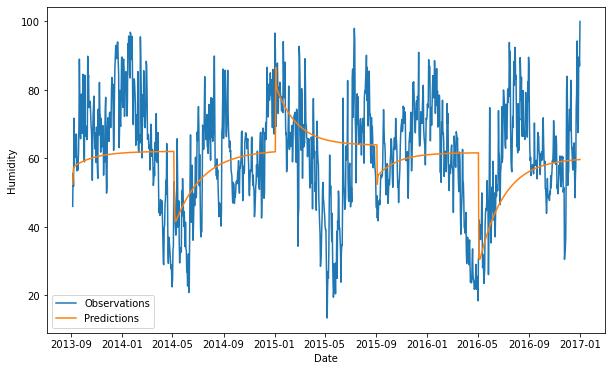

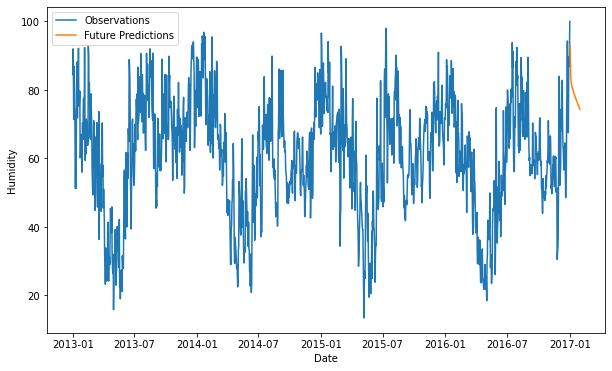

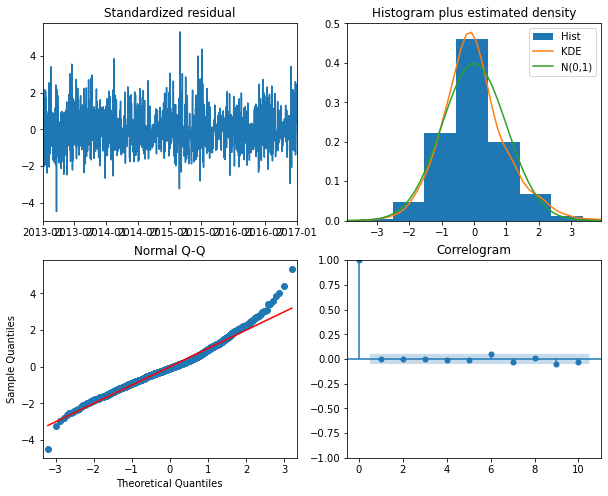

In [194]:

from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_absolute_percentage_error

# (a) Calcul des indicateurs
mean_value = df['humidity'].mean()
std_value = df['humidity'].std()
min_value = df['humidity'].min()
max_value = df['humidity'].max()

# Création de nouvelles colonnes pour les indicateurs dans la DataFrame
df['mean'] = mean_value
df['std'] = std_value
df['min'] = min_value
df['max'] = max_value

# (b) Recherche du meilleur modèle SARIMAX
exog_variables = ['mean', 'std', 'min', 'max']
model = auto_arima(df['humidity'], exogenous=df[exog_variables])

# Affichage des paramètres du meilleur modèle
print(model.summary())

# (c) Variables exogènes significatives
exog_significant = [exog_variables[i] for i, p_value in enumerate(result.seasonal) if abs(p_value) >= 2]
print("Variables exogènes significatives:", exog_significant)

# (d) Validation croisée et évaluation du modèle
tscv = TimeSeriesSplit(n_splits=5)

mape_scores = []
predictions = []

for train_index, test_index in tscv.split(df):
    train_data = df.iloc[train_index]
    test_data = df.iloc[test_index]
    
    model.fit(train_data['humidity'], exogenous=train_data[exog_significant])
    forecast = model.predict(n_periods=len(test_data), exogenous=test_data[exog_significant])
    
    predictions.extend(forecast)
    mape = mean_absolute_percentage_error(test_data['humidity'], forecast)
    mape_scores.append(mape)

mean_mape = np.mean(mape_scores)
print("MAPE:", mean_mape)

plt.figure(figsize=(10, 6))
plt.plot(df.index[-len(predictions):], df['humidity'][-len(predictions):], label='Observations')
plt.plot(df.index[-len(predictions):], predictions, label='Predictions')
plt.xlabel('Date')
plt.ylabel('Humidity')
plt.legend()
plt.show()

# (e) Prédiction de l'évolution future de l'humidité
future_period = 30
model.fit(df['humidity'], exogenous=df[exog_significant])
future_exog = pd.DataFrame(index=pd.date_range(start=df.index[-1] + pd.DateOffset(1), periods=future_period), columns=exog_significant)
future_exog = future_exog.fillna(df[exog_significant].mean())

future_forecast = model.predict(n_periods=future_period, exogenous=future_exog)
future_dates = pd.date_range(start=df.index[-1] + pd.DateOffset(1), periods=future_period)

plt.figure(figsize=(10, 6))
plt.plot(df.index, df['humidity'], label='Observations')
plt.plot(future_dates, future_forecast, label='Future Predictions')
plt.xlabel('Date')
plt.ylabel('Humidity')
plt.legend()
plt.show()

# (f) Pertinence d'un modèle saisonnier
model.plot_diagnostics(figsize=(10, 8))
plt.show()



Le modèle SARIMAX est un modèle de prévision utilisé pour modéliser les séries temporelles en prenant en compte des variables exogènes, c'est-à-dire des variables qui ne dépendent pas du temps et qui peuvent avoir une influence sur la série étudiée.

explication sur les resultat  :

Les coefficients : Ce sont les estimations des poids associés à chaque terme du modèle. Par exemple, "intercept" est le coefficient de l'intercept, "ar.L1" et "ar.L2" sont les coefficients des termes autorégressifs, et "ma.L1", "ma.L2" et "ma.L3" sont les coefficients des termes de moyenne mobile. Ces coefficients sont utilisés pour calculer les prédictions du modèle.

Les statistiques : Les statistiques fournies  donnent des informations sur l'ajustement du modèle aux données. Le "log likelihood" (vraisemblance logarithmique) est une mesure de la qualité de l'ajustement du modèle aux données observées. L'AIC (Critère d'Information d'Akaike) et le BIC (Critère d'Information Bayésien) sont des mesures de la qualité du modèle ajusté, avec des valeurs plus basses indiquant généralement un meilleur ajustement. Le "Sample" indique la plage de dates couverte par les données d'entraînement.

Les p-values : Les p-values (P>|z|) indiquent la significativité statistique des coefficients. Une p-value inférieure à un certain seuil (généralement 0,05) indique que le coefficient est statistiquement significatif, c'est-à-dire qu'il a une influence significative sur la série temporelle.

Les tests : Les tests de Ljung-Box (Q) et de Jarque-Bera (JB) évaluent certaines propriétés des résidus du modèle. Le test de Ljung-Box teste l'autocorrélation des résidus, tandis que le test de Jarque-Bera teste la normalité des résidus. Des valeurs significatives dans ces tests peuvent indiquer des problèmes avec le modèle.

L'erreur MAPE : Le MAPE (Mean Absolute Percentage Error) est une mesure d'erreur couramment utilisée pour évaluer la précision d'un modèle de prévision. Dans notre cas, le MAPE affiché est de 0,2459, soit environ 24,59%. Cela signifie que, en moyenne, les prédictions du modèle ont une erreur absolue d'environ 24,59% par rapport aux vraies valeurs de la série. Une valeur de MAPE plus faible indiquerait une meilleure précision des prédictions.

 les résultats de notre modèle SARIMAX indiquent les estimations des coefficients, les statistiques d'ajustement du modèle et les évaluations de la qualité du modèle. Le MAPE est une mesure d'erreur qui indique la précision des prédictions du modèle par rapport aux vraies valeurs.
 
les résultats de notre modèle SARIMAX montrent un log likelihood négatif, ce qui indique que le modèle ajusté est capable de capturer une partie des variations de la série temporelle. De plus, les coefficients associés aux termes du modèle sont significatifs, ce qui indique que ces termes ont une influence sur la série.
